In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

C:\Users\marie\AppData\Local\Temp\ipykernel_18904\4289387004.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dirpath = os.getcwd()
kp_model_path = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), "teat_keypoints")
kp_predictions = pd.read_csv(os.path.join(kp_model_path, "keypoint_test_predictions.csv"))
sg_model_path = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), "udder_segment")
sg_predictions = pd.read_csv(os.path.join(sg_model_path, "segment_test_predictions.csv"))

In [3]:
df = kp_predictions[['filename','edn_lf', 'edn_rf', 'edn_lr', 'edn_rr']]
df2 = pd.melt(df, id_vars = 'filename', value_vars =['edn_lf', 'edn_rf', 'edn_lr', 'edn_rr'] )

In [4]:
labels = ["left front", "right front", "left rear", "right rear"]
vals = df[['edn_lf', 'edn_rf', 'edn_lr', 'edn_rr']]
 

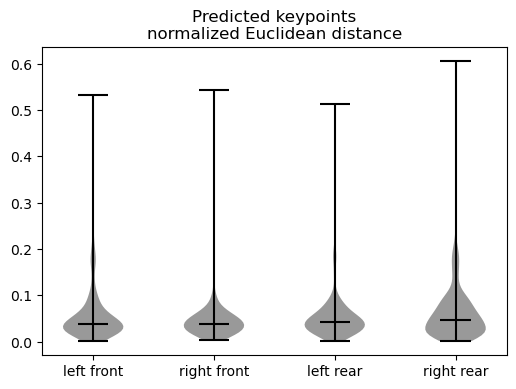

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
parts = ax.violinplot(vals, showextrema=True, showmedians=True)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(labels)

ax.set_title('Predicted keypoints\nnormalized Euclidean distance')
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_alpha(0.8)

for partname in ('cbars', 'cmins', 'cmaxes',  'cmedians'):
    vp = parts[partname]
    vp.set_edgecolor("black")

plt.savefig("keypoints.png")

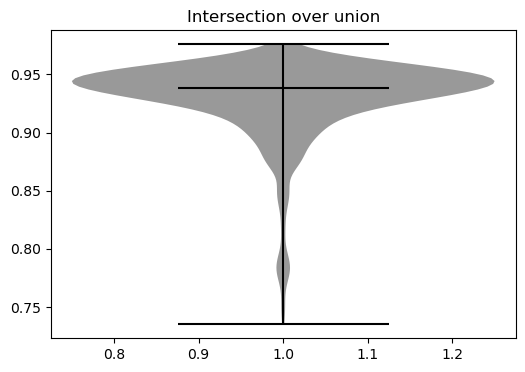

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
parts = ax.violinplot(sg_predictions["intersection_union"], showextrema=True, showmedians=True)

for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_alpha(0.8)

for partname in ('cbars', 'cmins', 'cmaxes',  'cmedians'):
    vp = parts[partname]
    vp.set_edgecolor("black")

ax.set_title('Intersection over union')

fig.savefig("segments.png")